In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def split_dataset(filepath = "./Boston-filtered.csv", testsize = 1/3, random_state = None):
    data = pd.read_csv(filepath)

    # Randomize the dataset and reset the index, randomstate is used to make the randomization reproducible
    data = data.sample(frac=1, random_state=random_state).reset_index(drop=True)

    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values

    # Split the dataset into training and test sets
    split_index = int(len(data) * (1 - testsize))

    X_train = X[:split_index]
    y_train = y[:split_index]

    X_test = X[split_index:]
    y_test = y[split_index:]

    return X_train, y_train, X_test, y_test

In [55]:
# (a)
def constant_attribute():
    X_train, y_train, X_test, y_test = split_dataset()
    num_runs = 20
    training_errors = []
    test_errors = []

    for run in range(num_runs):

        y_mean = np.mean(y_train)

        X_train_ones = np.ones(len(X_train))
        X_test_ones = np.ones(len(X_test))

        y_train_pred = y_mean * X_train_ones
        y_test_pred = y_mean * X_test_ones

        mse_train = np.mean((y_train - y_train_pred)**2)
        mse_test = np.mean((y_test - y_test_pred)**2)

        training_errors.append(mse_train)
        test_errors.append(mse_test)

    mean_training_error = np.mean(training_errors)
    mean_test_error = np.mean(test_errors)

    print(f"Mean Squared Error (MSE) for training set: {mean_training_error}")
    print(f"Mean Squared Error (MSE) for test set: {mean_test_error}")

constant_attribute()

Mean Squared Error (MSE) for training set: 78.34556260951491
Mean Squared Error (MSE) for test set: 96.9059145734254


(b) As constant prediction is used with no proper basis, we're not learning the relationship between features in the X dataset and one value is always predicted - the mean of the training label values.

The mean is the best value to use however when it comes to constant prediction as the mean minimises the squared difference betweenthe predicted and actual value

In [76]:
# (c)
def single_attribute(X_train, y_train, X_test, y_test):
    training_errors = []
    test_errors = []

    for i in range(X_train.shape[1]):
        X_train_single = X_train[:, i].reshape(-1, 1)
        X_test_single = X_test[:, i].reshape(-1, 1)

        # Augment the X matrix with a column of ones based off size of X_train and X_test
        X_train_augmented = np.hstack([X_train_single, np.ones((X_train_single.shape[0], 1))])
        X_test_augmented = np.hstack([X_test_single, np.ones((X_test_single.shape[0], 1))])

        w = np.linalg.inv(X_train_augmented.T @ X_train_augmented) @ X_train_augmented.T @ y_train

        y_train_pred = X_train_augmented @ w
        y_test_pred = X_test_augmented @ w

        mse_train = np.mean((y_train - y_train_pred)**2)
        mse_test = np.mean((y_test - y_test_pred)**2)

        training_errors.append(mse_train)
        test_errors.append(mse_test)    

    return training_errors, test_errors

num_runs = 20
all_mse_train = np.zeros((num_runs, 12))
all_mse_test = np.zeros((num_runs, 12))

for run in range(num_runs):
    X_train, y_train, X_test, y_test = split_dataset()

    mse_train, mse_test = single_attribute(X_train, y_train, X_test, y_test)
    all_mse_train[run] = mse_train
    all_mse_test[run] = mse_test

mean_mse_single_train = np.mean(all_mse_train, axis=0)
mean_mse_single_test = np.mean(all_mse_test, axis=0)


for i in range(12):
    print(f"Attribute {i+1} - Mean Training MSE: {mean_mse_single_train[i]:.4f}, Mean Test MSE: {mean_mse_single_test[i]:.4f}")


Attribute 1 - Mean Training MSE: 70.7634, Mean Test MSE: 74.5505
Attribute 2 - Mean Training MSE: 73.4978, Mean Test MSE: 73.7392
Attribute 3 - Mean Training MSE: 64.0909, Mean Test MSE: 66.0296
Attribute 4 - Mean Training MSE: 81.1015, Mean Test MSE: 83.9416
Attribute 5 - Mean Training MSE: 68.3451, Mean Test MSE: 70.5522
Attribute 6 - Mean Training MSE: 42.8812, Mean Test MSE: 45.4680
Attribute 7 - Mean Training MSE: 71.9949, Mean Test MSE: 73.5219
Attribute 8 - Mean Training MSE: 78.5228, Mean Test MSE: 80.6802
Attribute 9 - Mean Training MSE: 71.2305, Mean Test MSE: 74.3494
Attribute 10 - Mean Training MSE: 64.8797, Mean Test MSE: 68.2992
Attribute 11 - Mean Training MSE: 62.3330, Mean Test MSE: 63.6906
Attribute 12 - Mean Training MSE: 37.8606, Mean Test MSE: 40.1113


In [83]:
# (d)
def all_attributes(X_train, y_train, X_test, y_test):
    # Augment the X matrix with a column of ones based off size of X_train and X_test
    X_train_augmented = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
    X_test_augmented = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

    w = np.linalg.inv(X_train_augmented.T @ X_train_augmented) @ X_train_augmented.T @ y_train

    y_train_pred = X_train_augmented @ w
    y_test_pred = X_test_augmented @ w

    mse_train = np.mean((y_train - y_train_pred)**2)
    mse_test = np.mean((y_test - y_test_pred)**2)

    return mse_train, mse_test 


num_runs = 20
all_mse_train = np.zeros(num_runs)
all_mse_test = np.zeros(num_runs)

for run in range(num_runs):
    X_train, y_train, X_test, y_test = split_dataset()

    mse_train, mse_test = all_attributes(X_train, y_train, X_test, y_test)
    all_mse_train[run] = mse_train
    all_mse_test[run] = mse_test


mean_mse_train = np.mean(all_mse_train)
mean_mse_test = np.mean(all_mse_test)

print(f"Mean Squared Error (MSE) for training set: {mean_mse_train:.4f}")
print(f"Mean Squared Error (MSE) for test set: {mean_mse_test:.4f}")

Mean Squared Error (MSE) for training set: 21.9912
Mean Squared Error (MSE) for test set: 24.6799


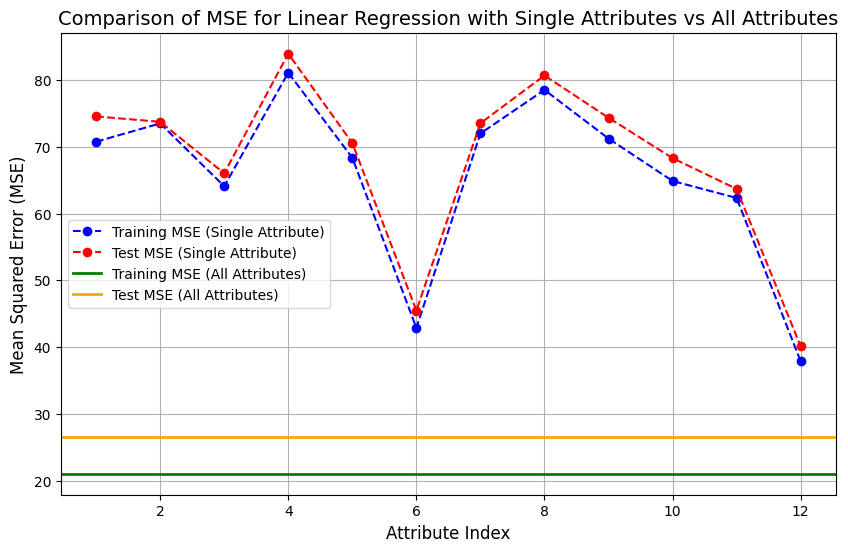

In [82]:
plt.figure(figsize=(10, 6))

# Plot individual attribute MSEs
plt.plot(range(1, 13), mean_mse_single_train, label="Training MSE (Single Attribute)", marker='o', linestyle='--', color='blue')
plt.plot(range(1, 13), mean_mse_single_test, label="Test MSE (Single Attribute)", marker='o', linestyle='--', color='red')

# Plot all attribute MSE
plt.axhline(mean_mse_train, label="Training MSE (All Attributes)", color='green', linestyle='-', linewidth=2)
plt.axhline(mean_mse_test, label="Test MSE (All Attributes)", color='orange', linestyle='-', linewidth=2)

# Labels and title
plt.xlabel('Attribute Index', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.title('Comparison of MSE for Linear Regression with Single Attributes vs All Attributes', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()